In [1]:
import os
import quantarhei as qr
import quantarhei.spectroscopy as spec
print("Quantarhei version:", qr.Manager().version)

Quantarhei version: 0.0.47


In [2]:
#
# Simulation directory
#
dirname = "sim_up"

#
# Simulation to analyze is characterized by its parameters = its "character"
#
character = "_omega2=500.0_dO=100.0_HR=0.01_J=100.0_vib.qrp"

In [3]:
#
#  These functions specify the labels and markers on the 2D spectra
#

def label_func(sp):
    
    dE = sp.get_log_params()["dE"]
    return (["$\Delta E = "+str(dE)+"$ cm$^{-1}$", "$\omega = 500$ cm$^{-1}$"], [[0.05, 0.9], [0.05, 0.1]])

def show_states_func(sp):
    prms = sp.get_log_params()
    E0 = prms["E0"]
    dE = prms["dE"]
    try:
        omega = prms["omega"]
    except:
        omega = 500.0
    return [E0, E0+dE, [E0+dE-omega, '--r'],[E0+dE+omega,'--b']]


Making movie no. 1 of 4 ( p_re )


/Users/tomas/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Making movie no. 2 of 4 ( m_re )


/Users/tomas/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Making movie no. 3 of 4 ( p_nr )


/Users/tomas/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Making movie no. 4 of 4 ( m_nr )


/Users/tomas/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


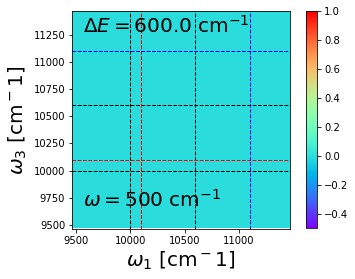

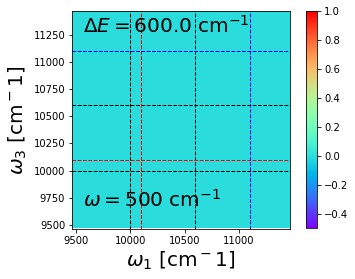

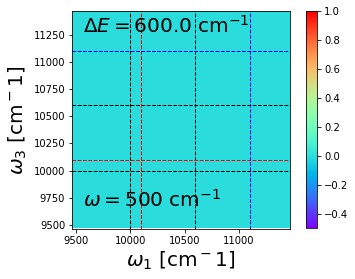

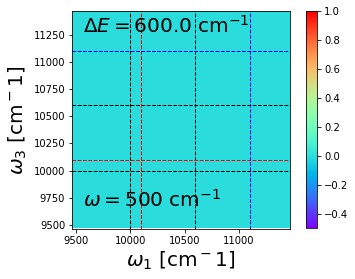

In [4]:
#
# Movies are created here
#

snames = ["p_re", "m_re", "p_nr", "m_nr"]
normalize_each = False

ii = 1
Ni = len(snames)
for sname in snames:

    pname = os.path.join(dirname, "cont_"+sname+".qrp")

    cont = qr.load_parcel(pname)
    cont.normalize2(each=normalize_each, dpart=qr.part_ABS)
    with qr.energy_units("1/cm"):
        cont.trimall_to([9500,11500,9500,11500])

    print("Making movie no.", ii, "of", Ni, "(", sname,")")
    with qr.energy_units("1/cm"):
        mname = "movie_"+sname
        if normalize_each:
            mname += "_norm_each.mp4"
        else:
            mname += "_norm_glob.mp4"
        cont.make_movie(mname, spart=qr.part_ABS, Npos_contours=10, label_func=label_func, show_states_func=show_states_func)
        
    ii += 1

### Loading and analyzing pathways


In [5]:
#
# Pick a t2 value
#
t2 = 50.0

#
# If pathways with corresponding t2 and character are saved, they will be loaded
#
filename = "pws_t2="+str(t2)+character #_omega2=500.0_dO=100.0_HR=0.01_J=100.0_vib.qrp"
fname = os.path.join(dirname, filename)

pws = qr.load_parcel(fname)

In [6]:
#
# Here one can search among the pathways for those that are relevant
#
pwa = qr.LiouvillePathwayAnalyzer(pws)
pwa.order_by_amplitude()
print("All pathways: ", len(pwa.get_pathways()))

# here we select the type of pathways
pwa.select_type(ptype="REPH")
print("Rephasing: ", len(pwa.get_pathways()))

# here we select the window in 2D spectrum according to the \omega_1 and \omega_3
with qr.energy_units("1/cm"):
    pwa.select_frequency_window(window=[10400, 10800, 11000, 11250])
print("In the window: ", len(pwa.get_pathways()))
#pwa.select_amplitude_GT(1.0e-3)
#print(len(pwa.get_pathways()))

#
# Here are the pathways that survived selection
#
pws = pwa.get_pathways()

All pathways:  27
Rephasing:  17
In the window:  5


In [7]:
#
# Look at the pathways
#
with qr.energy_units("1/cm"):
    print(pwa.get_pathways()[4])



Liouville Pathway R2g (type = R) 
Weighting prefactor: (-7.4571548242392562e-08-7.2333146279202445e-08j) 

    |0         0|  
--->|-----------|  
    |           |  
    |7         0|      11117.0
    |-----------|<---  
    |           |  
    |7         5|      501.0
  >>|***********|<< 
    |           | 
    |5         5|      0.0
--->|-----------|  
    |           |  
    |0         5|      -10617.0
    |-----------|<---  
    |           |  
    |0         0|  



In [8]:
#
# Calculate 2D spectrum for selected pathways
#
pathways_to_calculate = pws[0:5] # [sps[1], sps[0]]

time1 = qr.TimeAxis(0.0, 100, 10.0)
time2 = qr.TimeAxis(0.0, 100, 10.0)
time3 = qr.TimeAxis(0.0, 100, 10.0)
calc = qr.MockTwoDResponseCalculator(time1, time2, time3)
with qr.energy_units("1/cm"):
    calc.bootstrap(rwa=10250.0, pathways=pathways_to_calculate)
    
# The time t2 below is irrelevant
twod = calc.calculate_one(0)

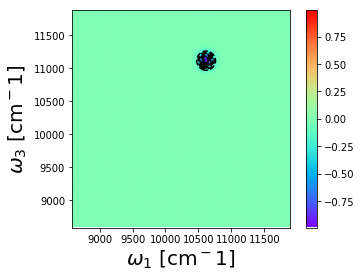

In [9]:
#
# Plotting 2D spectrum corresponding to selected pathways
#
with qr.energy_units("1/cm"):
    twod.plot()

In [10]:

agg = qr.load_parcel(os.path.join(dirname,"aggregate.qrp"))

In [11]:
with qr.energy_units("1/cm"):
    agg.exciton_report()

Report on excitonic properties
------------------------------

Exciton 1

Transition energy        : 500.00000000 1/cm
Transition dipole moment : 0.00000000 D
+-------+------------+--------------+------------------+
| index | squares    | coefficients | state signatures |
+-------+------------+--------------+------------------+
| 1     | 1.00000000 | 1.00000000   | ((0, 0), (1,))   |
| 0     | 0.00000000 | 0.00000000   | ((0, 0), (0,))   |
| 2     | 0.00000000 | 0.00000000   | ((0, 0), (2,))   |
| 3     | 0.00000000 | 0.00000000   | ((1, 0), (0,))   |
| 4     | 0.00000000 | 0.00000000   | ((1, 0), (1,))   |
+-------+------------+--------------+------------------+

Exciton 2

Transition energy        : 1000.00000000 1/cm
Transition dipole moment : 0.00000000 D
+-------+------------+--------------+------------------+
| index | squares    | coefficients | state signatures |
+-------+------------+--------------+------------------+
| 2     | 1.00000000 | 1.00000000   | ((0, 0), (2,))   |
| 

In [15]:
agg.report_on_expansion(3)
agg.report_on_expansion(5)
agg.report_on_expansion(7)

+-------+------------+--------------+------------------+
| index | squares    | coefficients | state signatures |
+-------+------------+--------------+------------------+
| 3     | 0.97450235 | 0.98716885   | ((1, 0), (0,))   |
| 6     | 0.02542023 | -0.15943723  | ((0, 1), (0,))   |
| 7     | 0.00007527 | -0.00867572  | ((0, 1), (1,))   |
| 4     | 0.00000198 | -0.00140642  | ((1, 0), (1,))   |
| 8     | 0.00000018 | -0.00041945  | ((0, 1), (2,))   |
+-------+------------+--------------+------------------+
+-------+------------+--------------+------------------+
| index | squares    | coefficients | state signatures |
+-------+------------+--------------+------------------+
| 6     | 0.96912804 | -0.98444301  | ((0, 1), (0,))   |
| 3     | 0.02527954 | -0.15899540  | ((1, 0), (0,))   |
| 4     | 0.00545088 | 0.07383007   | ((1, 0), (1,))   |
| 7     | 0.00013758 | -0.01172939  | ((0, 1), (1,))   |
| 5     | 0.00000275 | 0.00165949   | ((1, 0), (2,))   |
+-------+------------+---------

### Time evolution of pathways

In [12]:
#
# Here we can look at the time evolution corresponding to a selected pathway.
#
eUt = qr.load_parcel(os.path.join(dirname,"eUt"+character)) #_omega2=500.0_dO=100.0_HR=0.01_J=100.0_vib.qrp"))

/Users/tomas/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


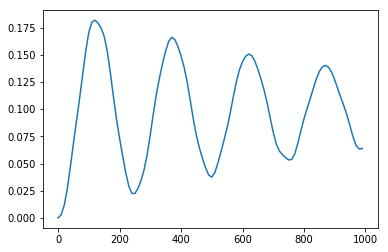

In [13]:
#
# The indexes have to be translated from left-right-top-down to left-right-left-right 
#

#
# The pathway below gives ...
#

#
# Liouville Pathway R2g (type = R) 
# Weighting prefactor: (-7.4571548242392562e-08-7.2333146279202445e-08j) 

#     |0         0|  
# --->|-----------|  
#     |           |  
#     |7         0|      11117.0
#     |-----------|<---  
#     |           |  
#     |7         5|      501.0
#   >>|***********|<< 
#     |           | 
#     |5         5|      0.0
# --->|-----------|  
#     |           |  
#     |0         5|      -10617.0
#     |-----------|<---  
#     |           |  
#     |0         0|  


eUt.plot_element([5,7,5,5], show=False)



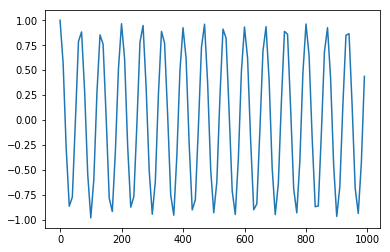

In [14]:
eUt.plot_element([4,3,4,3], show=True)